In [9]:
from keras_synthetic_genome_sequence import MultivariateGapWindowsSequence
from keras_synthetic_genome_sequence.utils import get_gaps_statistics
from ucsc_genomes_downloader import Genome
from ucsc_genomes_downloader.utils import tessellate_bed
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, ks_2samp

In [2]:
assembly = Genome("hg19")

In [3]:
window_size = 1000
batch_size = 100000
max_gap_size = 3

In [4]:
number, mean, covariance = get_gaps_statistics(
    genome=assembly,
    max_gap_size=max_gap_size,
    window_size=window_size
)

In [5]:
ground_truth = tessellate_bed(assembly.filled(), window_size=window_size)

In [6]:
gap_sequence = MultivariateGapWindowsSequence(
    assembly=assembly,
    bed=ground_truth,
    gaps_mean=mean,
    gaps_covariance=covariance,
    batch_size=batch_size
)

In [7]:
X, y = gap_sequence[0]
synthetic_mean = np.isclose(X, 0.25).all(axis=-1).mean(axis=0)

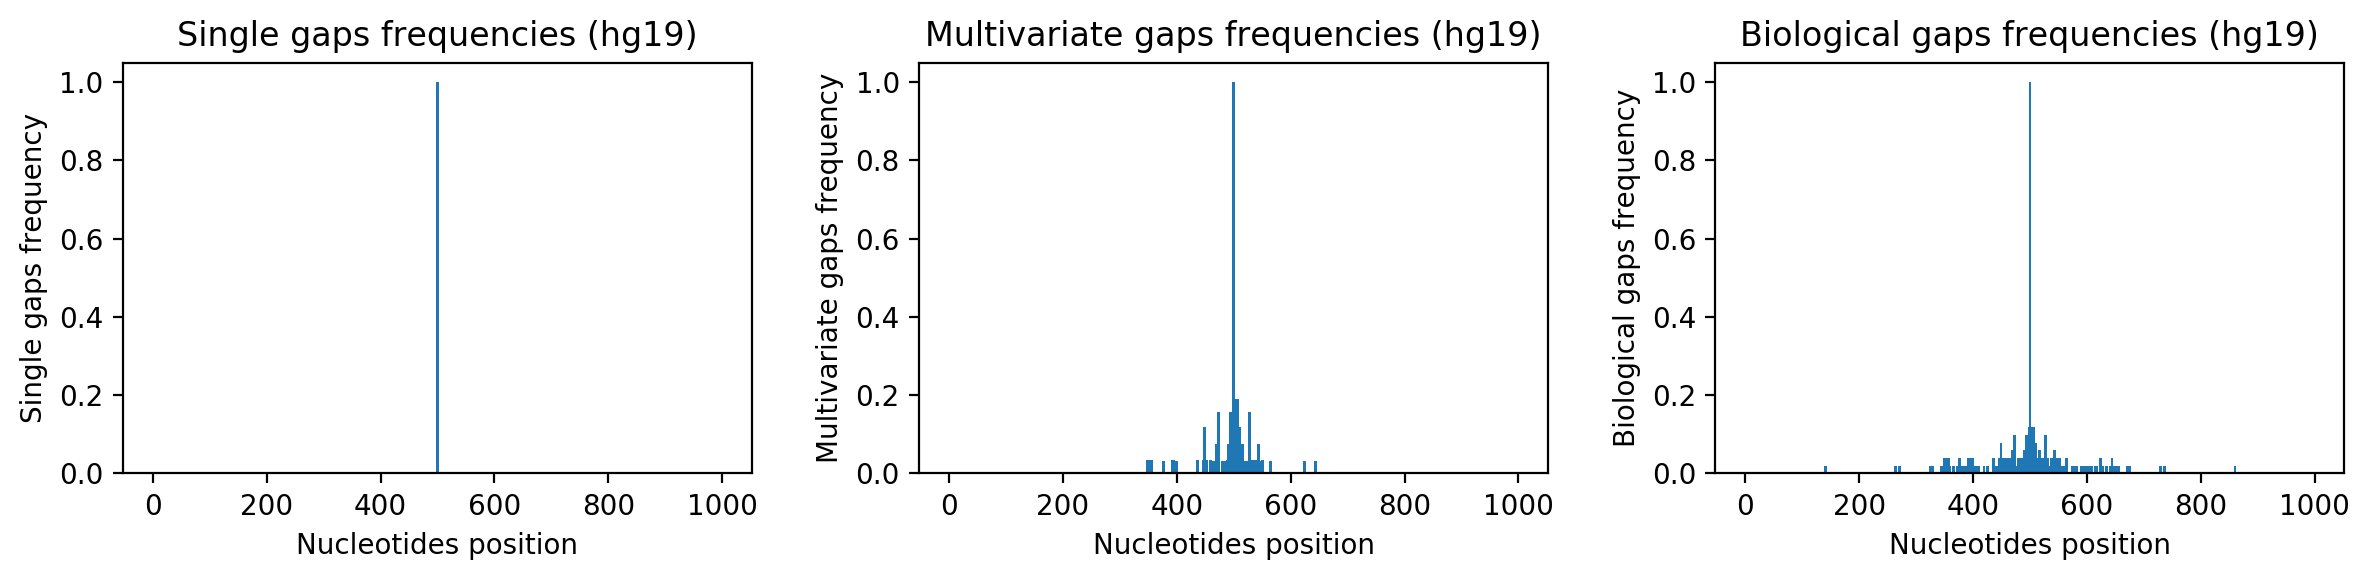

Gaps number 51
wilcoxon WilcoxonResult(statistic=2652.0, pvalue=4.108463998517357e-13)
ks_2samp Ks_2sampResult(statistic=0.114, pvalue=4.441088228134397e-06)


In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3), dpi=200)
x = range(window_size)

single_gap = np.zeros((window_size,))
single_gap[window_size//2] = 1

ax1, ax2, ax3 = axes.ravel()

ax1.bar(x, single_gap, width=5)
ax1.set_title(f"Single gaps frequencies ({assembly.assembly})")
ax1.set_ylabel("Single gaps frequency")
ax1.set_xlabel("Nucleotides position")

ax2.bar(x, synthetic_mean, width=5)
ax2.set_title(f"Multivariate gaps frequencies ({assembly.assembly})")
ax2.set_ylabel("Multivariate gaps frequency")
ax2.set_xlabel("Nucleotides position")

ax3.bar(x, mean, width=5)
ax3.set_title(f"Biological gaps frequencies ({assembly.assembly})")
ax3.set_ylabel("Biological gaps frequency")
ax3.set_xlabel("Nucleotides position")

fig.tight_layout()
fig.savefig("hg19_distributions.jpg")
plt.show()

print("Gaps number", number)
for test in (wilcoxon, ks_2samp):
    print(test.__name__, test(mean, synthetic_mean))